In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pickle as pkl

In [112]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [113]:
df.shape

(768, 9)

In [114]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- There are no null values

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Statistical analysis of the data

In [116]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [117]:
target_vals = df['Outcome'].value_counts()
target_vals

Outcome
0    500
1    268
Name: count, dtype: int64

- 0 --> Non-diabetic patients
- 1 --> Diabetic patients

In [118]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


- Above table shows that the mean of all the features is higher for diabetic patients than non-diabetic patients. This means that the diabetic patients have higher values of all the features than non-diabetic patients.

- Moreover, people with diabetes have much higher value of glucose and insulin than people without diabetes.

<Axes: >

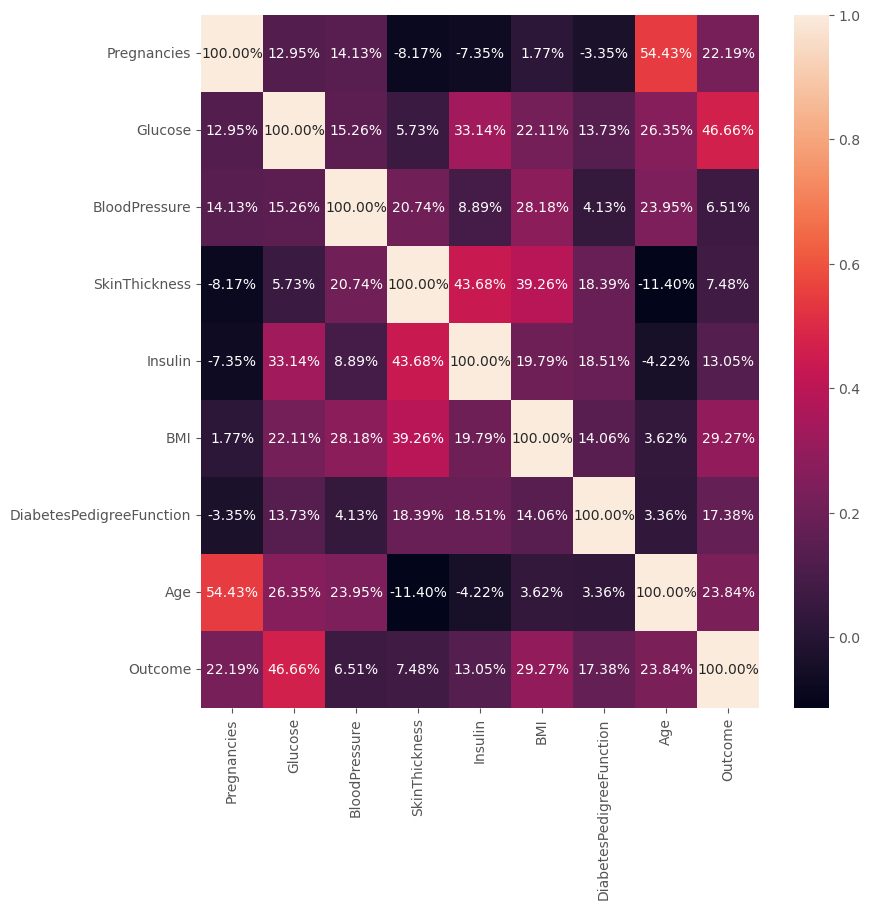

In [119]:
plt.figure(figsize=(9, 9))
sns.heatmap(df.corr(), annot=True, fmt='.2%')

- All the columns are moderately correlated

In [120]:
print("Percentage of patients without diabetes: " , round(target_vals[0]/len(df.Outcome), 2)*100)
print("Percentage of patients with diabetes: " , round(target_vals[1]/len(df.Outcome), 2)*100)

Percentage of patients without diabetes:  65.0
Percentage of patients with diabetes:  35.0


- Separating data and labels

In [121]:
x = df.drop(columns='Outcome', axis = 1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [122]:
y = df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

- Data Standardization

In [123]:
scalar = StandardScaler()

In [124]:
scalar.fit(x)

StandardScaler()

In [125]:
standardized_data = scalar.transform(x)
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [126]:
pkl.dump(scalar, open('scaler.pkl', 'wb'))
# scalar

In [127]:
X = standardized_data
Y = df['Outcome']

- train test split


In [128]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2, stratify=y, random_state = 2)

In [129]:
train_x.shape

(614, 8)

In [130]:
test_x.shape


(154, 8)

In [131]:
train_y.shape

(614,)

In [132]:

test_y.shape


(154,)

- Model Training

- LOGISTIC REGRESSION


In [133]:
lr = LogisticRegression()
lr = lr.fit(train_x, train_y)
lr

LogisticRegression()

In [134]:
logistic_train_pred = lr.predict(train_x)
logistic_test_pred = lr.predict(test_x)

In [135]:
print("Logistic Regression Training Accuracy: ", round(accuracy_score(train_y, logistic_train_pred), 2)*100)
print("Logistic Regression Testing Accuracy: ", round(accuracy_score(test_y, logistic_test_pred), 2)*100)

Logistic Regression Training Accuracy:  79.0
Logistic Regression Testing Accuracy:  76.0


In [136]:
pkl.dump(lr, open('lr.pkl', 'wb'))
# lr

- NAIVE BAYES

In [137]:
nb = GaussianNB()
nb.fit(train_x, train_y)


GaussianNB()

In [138]:
naive_train_pred = nb.predict(train_x)
naive_test_pred = nb.predict(test_x)

In [139]:
print("Naive Bayes Training Accuracy: ", round(accuracy_score(train_y, naive_train_pred), 2)*100)
print("Naive Bayes Testing Accuracy: ", round(accuracy_score(test_y, naive_test_pred), 2)*100)

Naive Bayes Training Accuracy:  76.0
Naive Bayes Testing Accuracy:  77.0


- KNN

In [140]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(train_x, train_y)


KNeighborsClassifier(n_neighbors=50)

In [141]:
knn_train_pred = knn.predict(train_x)
knn_test_pred = knn.predict(test_x)

In [142]:
print("KNN Training Accuracy: ", round(accuracy_score(train_y, knn_train_pred), 2)*100)
print("KNN Testing Accuracy: ", round(accuracy_score(test_y, knn_test_pred), 2)*100)

KNN Training Accuracy:  77.0
KNN Testing Accuracy:  73.0


- Decision Trees

In [143]:
max_accuracy = 0   
for i in range(2000):
    clf = DecisionTreeClassifier(random_state = i)
    clf.fit(train_x, train_y)
    pred = clf.predict(test_x)
    current_accuracy = round(accuracy_score(pred, test_y)*100,2)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_random_state = i

# print("Best Random State: ", best_random_state)
# print("Best Accuracy: ", max_accuracy)

clf = DecisionTreeClassifier(random_state = best_random_state)
clf.fit(train_x, train_y)

DecisionTreeClassifier(random_state=91)

[Text(0.453125, 0.96875, 'x[1] <= 0.207\ngini = 0.454\nsamples = 614\nvalue = [400, 214]'),
 Text(0.20545212765957446, 0.90625, 'x[7] <= -0.403\ngini = 0.296\nsamples = 388\nvalue = [318, 70]'),
 Text(0.10638297872340426, 0.84375, 'x[5] <= 1.702\ngini = 0.151\nsamples = 219\nvalue = [201, 18]'),
 Text(0.0851063829787234, 0.78125, 'x[0] <= 1.085\ngini = 0.13\nsamples = 215\nvalue = [200, 15]'),
 Text(0.07446808510638298, 0.71875, 'x[5] <= -0.132\ngini = 0.122\nsamples = 214\nvalue = [200, 14]'),
 Text(0.02127659574468085, 0.65625, 'x[6] <= 0.592\ngini = 0.016\nsamples = 122\nvalue = [121, 1]'),
 Text(0.010638297872340425, 0.59375, 'gini = 0.0\nsamples = 106\nvalue = [106, 0]'),
 Text(0.031914893617021274, 0.59375, 'x[6] <= 0.648\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.02127659574468085, 0.53125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0425531914893617, 0.53125, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.1276595744680851, 0.65625, 'x[6] <= 0.573\ngi

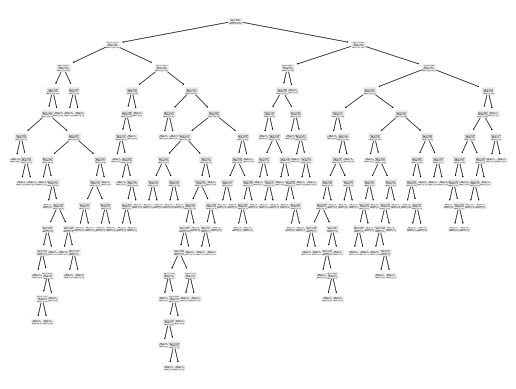

In [144]:
tree.plot_tree(clf)

In [145]:
decision_train_pred = clf.predict(train_x)
decision_test_pred = clf.predict(test_x)

In [146]:
print("Decision Tree Training Accuracy: ", round(accuracy_score(train_y, decision_train_pred), 2)*100)
print("Decision Tree Testing Accuracy: ", round(accuracy_score(test_y, decision_test_pred), 2)*100)

Decision Tree Training Accuracy:  100.0
Decision Tree Testing Accuracy:  73.0



- Random Forest

In [147]:
rf = RandomForestClassifier(n_estimators=500, random_state = best_random_state)

In [148]:
rf.fit(train_x, train_y)

RandomForestClassifier(n_estimators=500, random_state=91)

In [149]:
rf_train_pred = rf.predict(train_x)
rf_test_pred = rf.predict(test_x)

In [150]:
print("Random Forest Training Accuracy: ", round(accuracy_score(train_y, rf_train_pred), 2)*100)
print("Random Forest Testing Accuracy: ", round(accuracy_score(test_y, rf_test_pred), 2)*100)

Random Forest Training Accuracy:  100.0
Random Forest Testing Accuracy:  73.0


- SVM

In [151]:
classifier = SVC(kernel = 'linear')
classifier.fit(train_x, train_y)


SVC(kernel='linear')

In [152]:
print("SVM Training Accuracy: ", round(classifier.score(train_x, train_y)*100, 2))
print("SVM Testing Accuracy: ", round(classifier.score(test_x, test_y)*100, 2))

SVM Training Accuracy:  78.66
SVM Testing Accuracy:  77.27


In [153]:
input_data = (10,139,80,0,0,27.1,1.441,57)
data = np.array(input_data)
data

array([ 10.   , 139.   ,  80.   ,   0.   ,   0.   ,  27.1  ,   1.441,
        57.   ])

In [154]:
std_data = scalar.transform(data.reshape(1, -1))

c:\Users\bcchh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [155]:
prediction = nb.predict(std_data)
prediction

array([1], dtype=int64)

In [156]:
if prediction == 1:
    print("The patient has diabetes")
else:
    print("The patient does not have diabetes")

The patient has diabetes


In [157]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

Text(0.5, 0, 'SkinThickness')

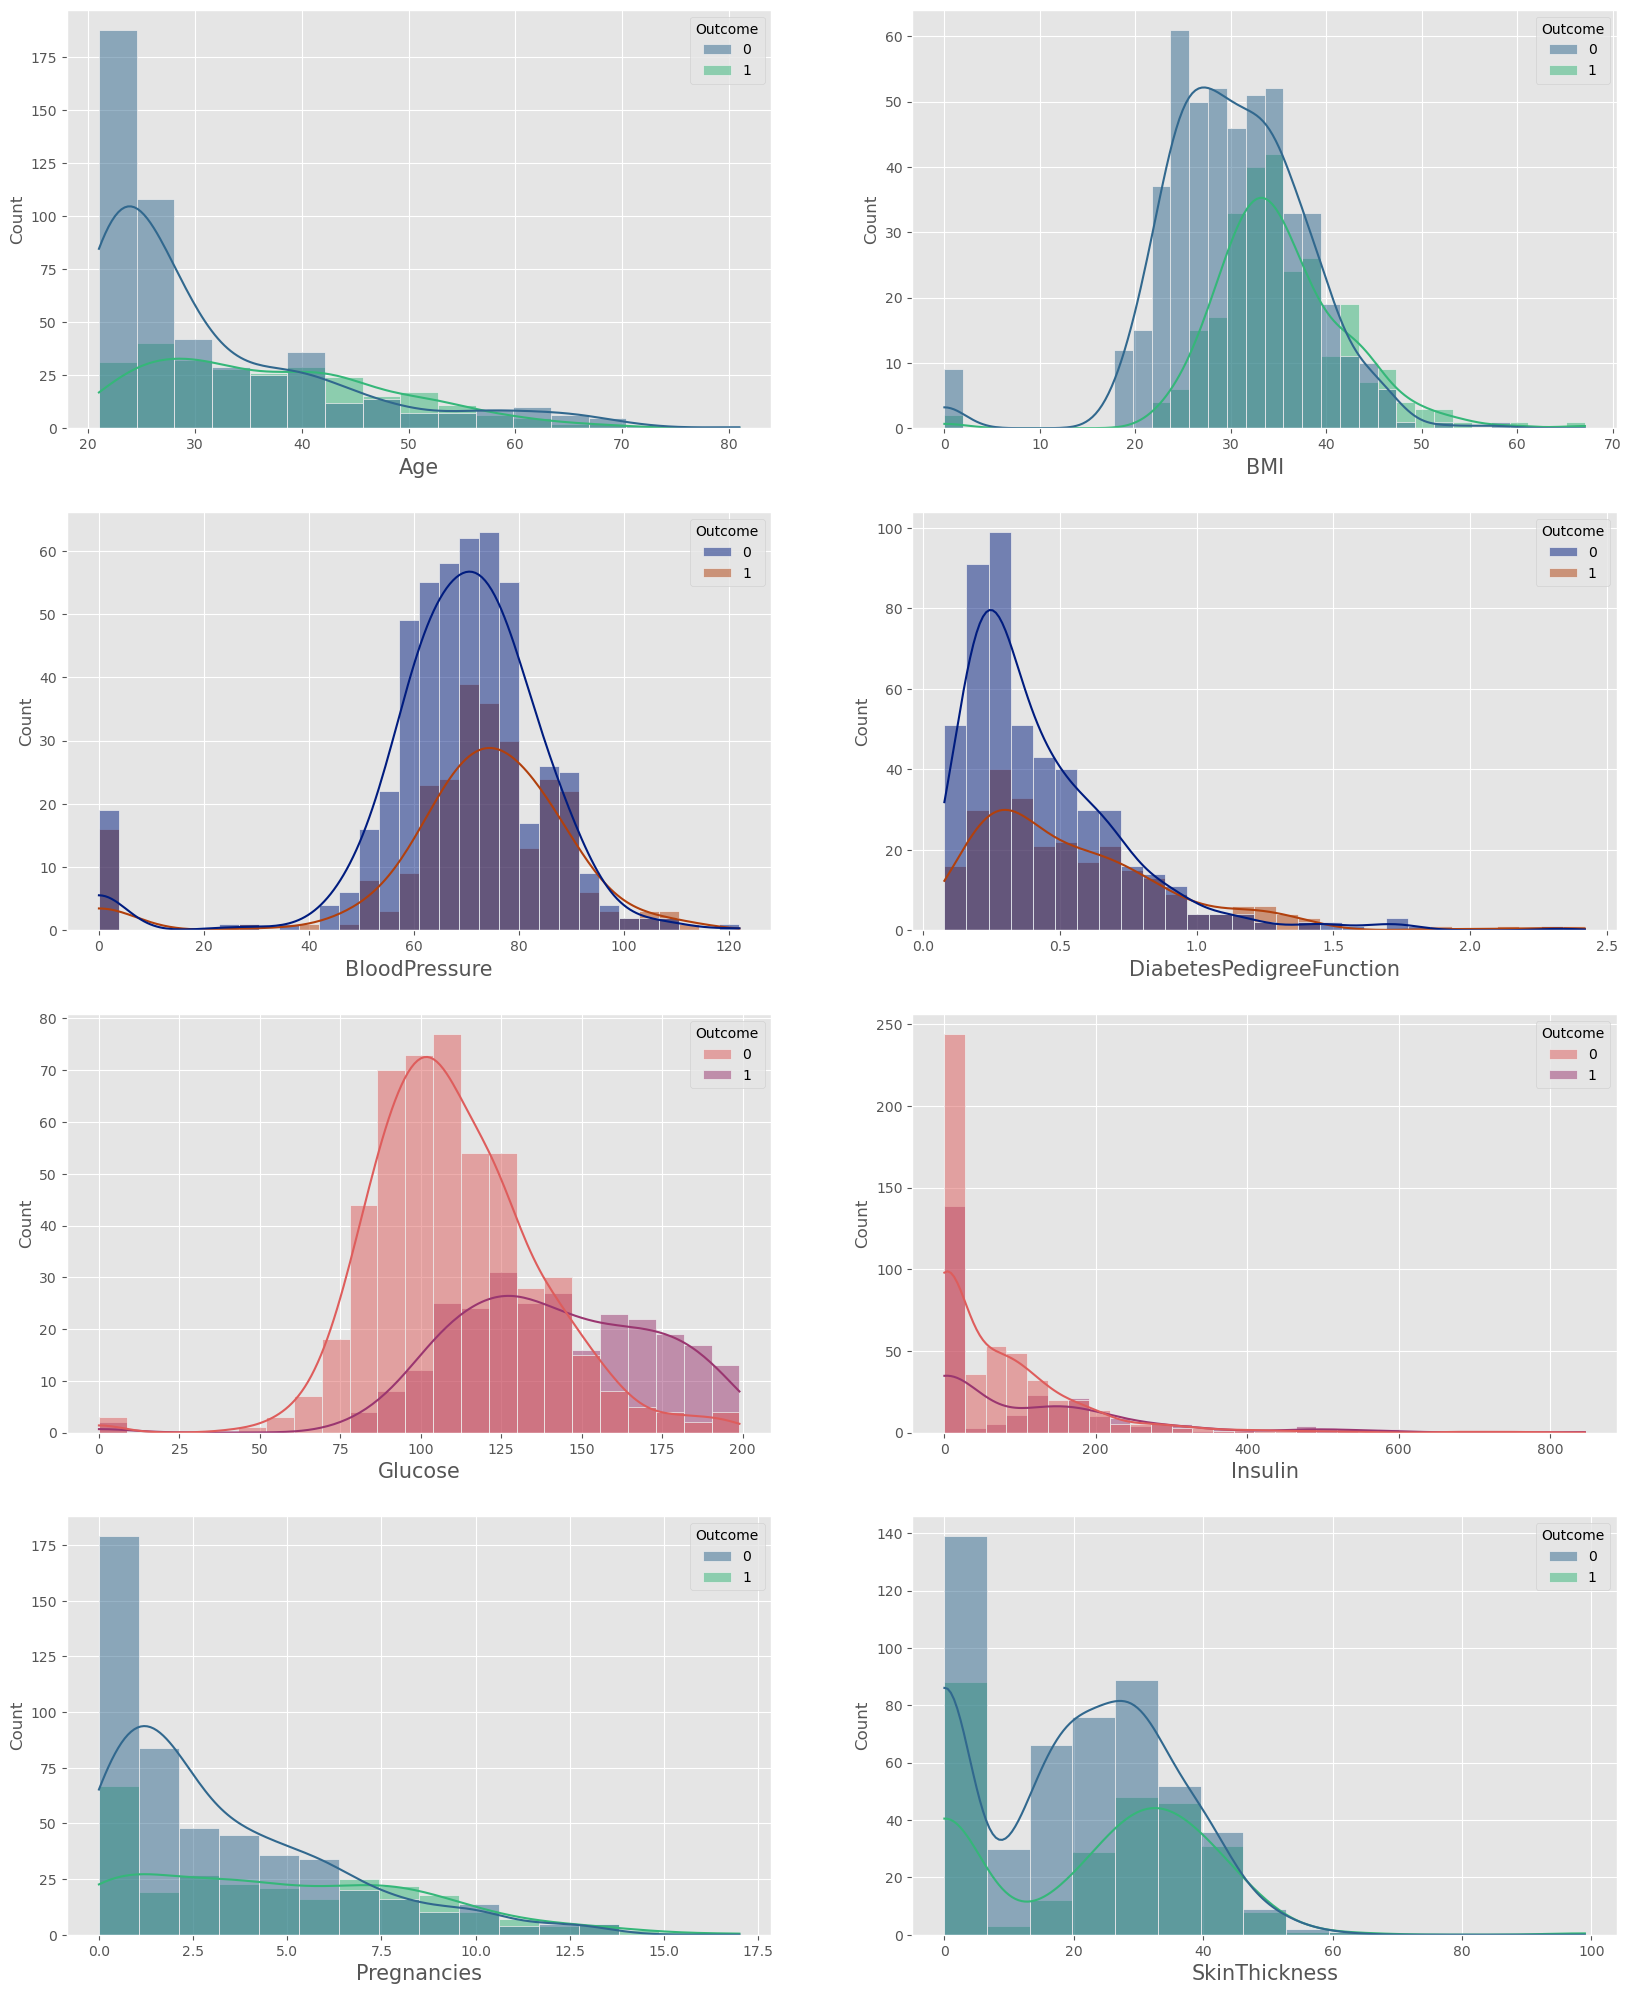

In [158]:
fig, ax = plt.subplots(4, 2, figsize=(20, 25))
plt.style.use('ggplot')

sns.histplot(x = df['Age'], hue = df['Outcome'], palette="viridis",kde = True, ax = ax[0, 0])
ax[0,0].set_xlabel('Age', fontsize = 15)

sns.histplot(x = df['BMI'], hue = df['Outcome'], palette="viridis",kde = True, ax = ax[0, 1])
ax[0,1].set_xlabel('BMI', fontsize = 15)


sns.histplot(x = df['BloodPressure'], hue = df['Outcome'], palette="dark",kde = True, ax = ax[1, 0])
ax[1,0].set_xlabel('BloodPressure', fontsize = 15)

sns.histplot(x = df['DiabetesPedigreeFunction'], hue = df['Outcome'], palette="dark",kde = True, ax = ax[1, 1])
ax[1,1].set_xlabel('DiabetesPedigreeFunction', fontsize = 15)


sns.histplot(x = df['Glucose'], hue = df['Outcome'], palette="flare",kde = True, ax = ax[2, 0])
ax[2,0].set_xlabel('Glucose', fontsize = 15)

sns.histplot(x = df['Insulin'], hue = df['Outcome'], palette="flare",kde = True, ax = ax[2, 1])
ax[2,1].set_xlabel('Insulin', fontsize = 15)


sns.histplot(x = df['Pregnancies'], hue = df['Outcome'], palette="viridis",kde = True, ax = ax[3, 0])
ax[3,0].set_xlabel('Pregnancies', fontsize = 15)

sns.histplot(x = df['SkinThickness'], hue = df['Outcome'], palette="viridis",kde = True, ax = ax[3, 1])
ax[3,1].set_xlabel('SkinThickness', fontsize = 15)


In [159]:
cf_matrix = confusion_matrix(test_y, rf_test_pred)
cf_matrix

# Order: TN, FP, FN, TP 

array([[87, 13],
       [28, 26]], dtype=int64)

In [160]:
tn, fp, fn, tp = cf_matrix.ravel()
print(tn, fp, fn, tp)

# Ravel function is used to extract the confusion matrix values

87 13 28 26


<Axes: >

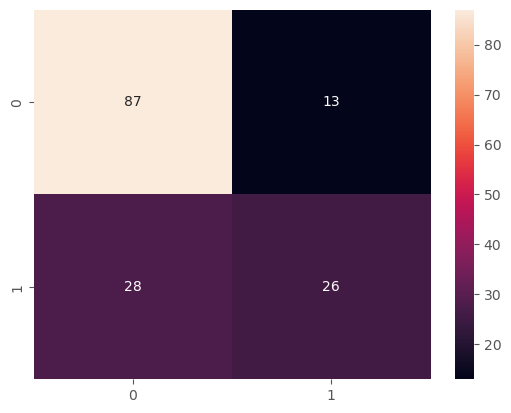

In [161]:
sns.heatmap(cf_matrix, annot=True)

# Annot displays labels

In [162]:
precision_recall_fscore_support(test_y, naive_test_pred, average = 'macro')

(0.7568615126754661, 0.727037037037037, 0.736649240240387, None)

In [163]:
pkl.dump(nb, open('nb.pkl', 'wb'))
# nb

c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

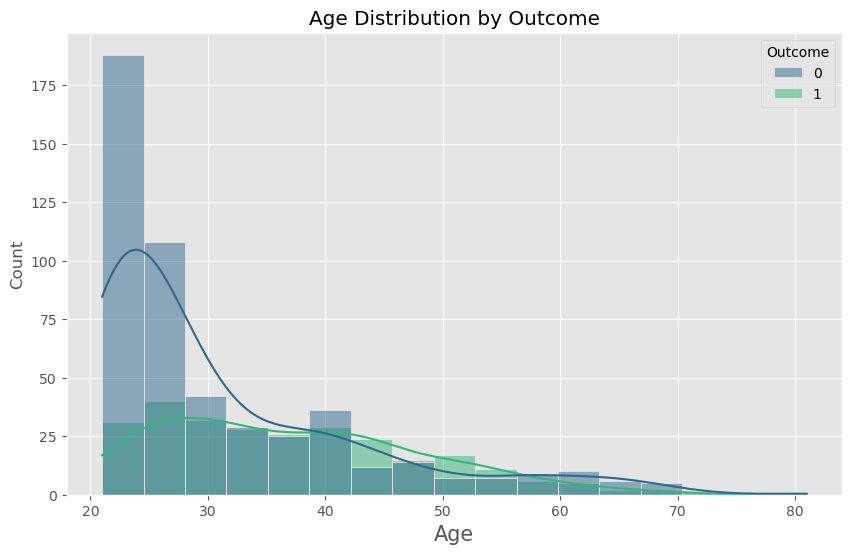

c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


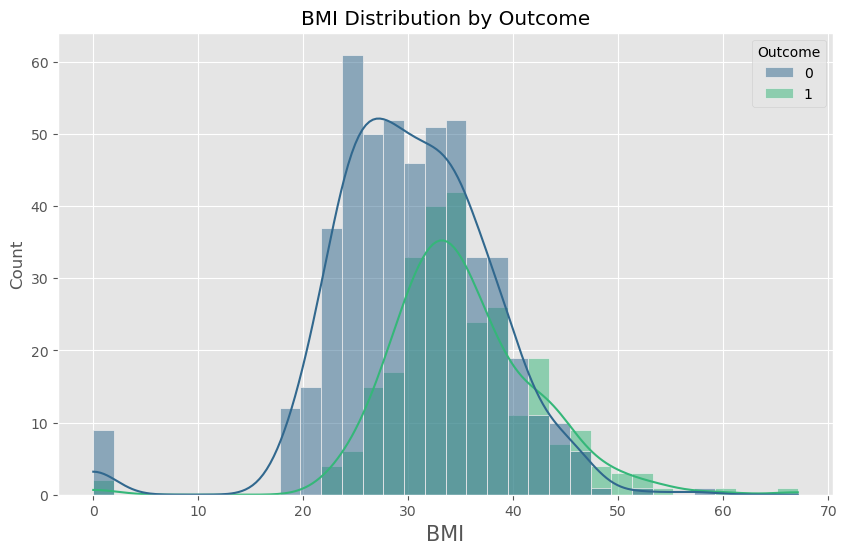

c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

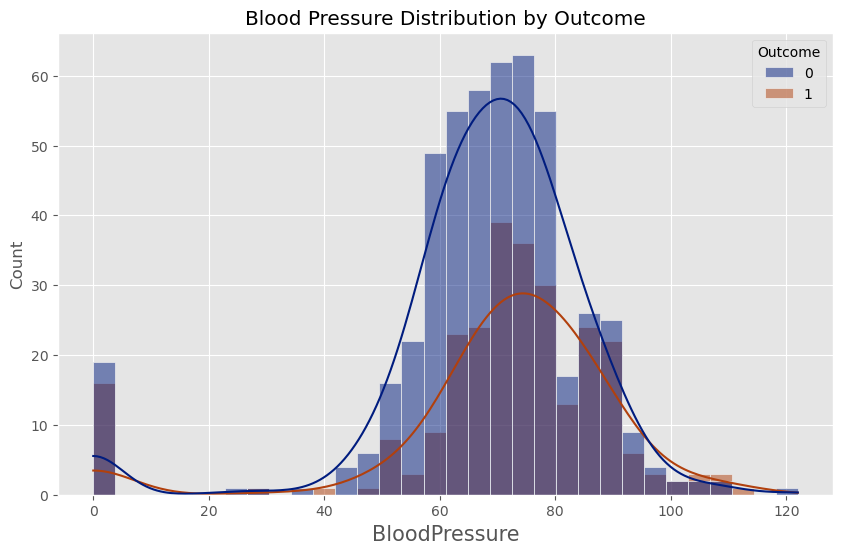

c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


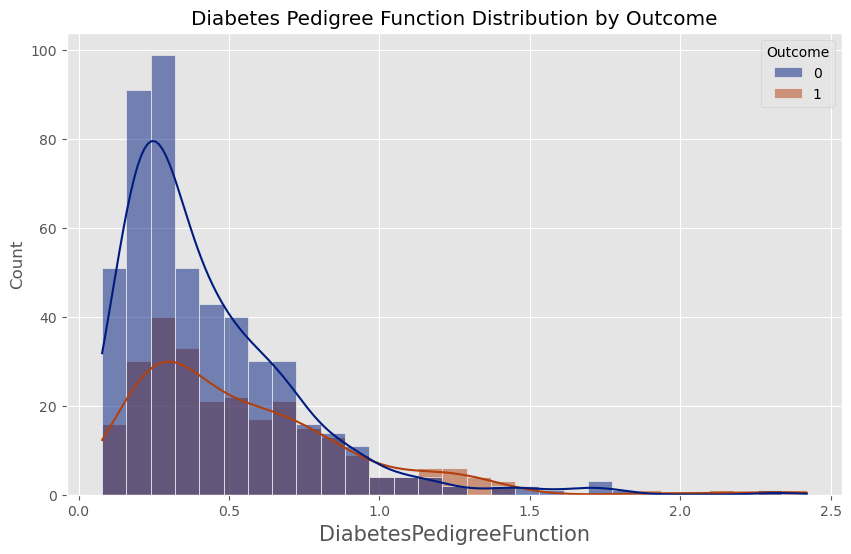

c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

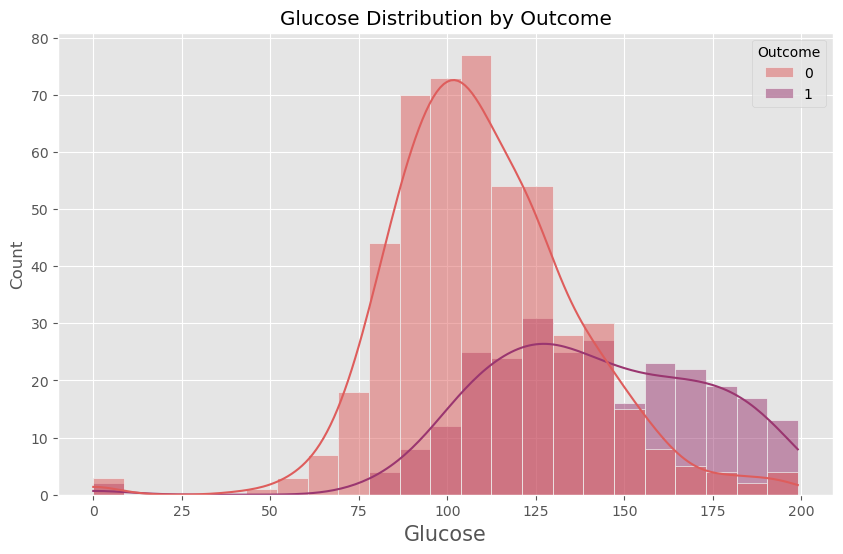

c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

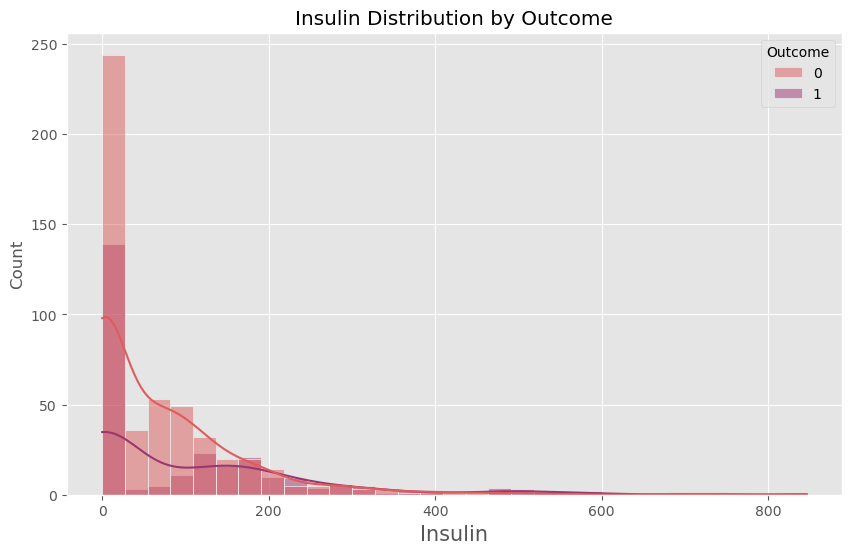

c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

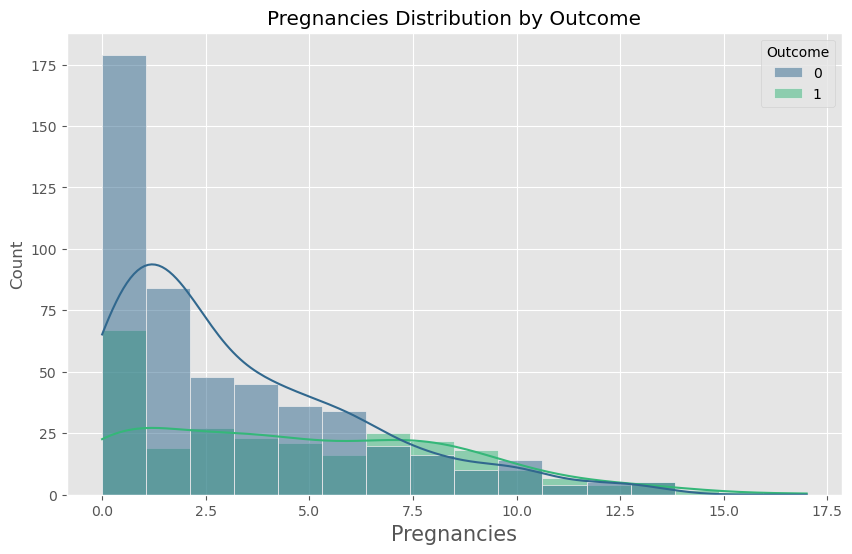

c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bcchh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

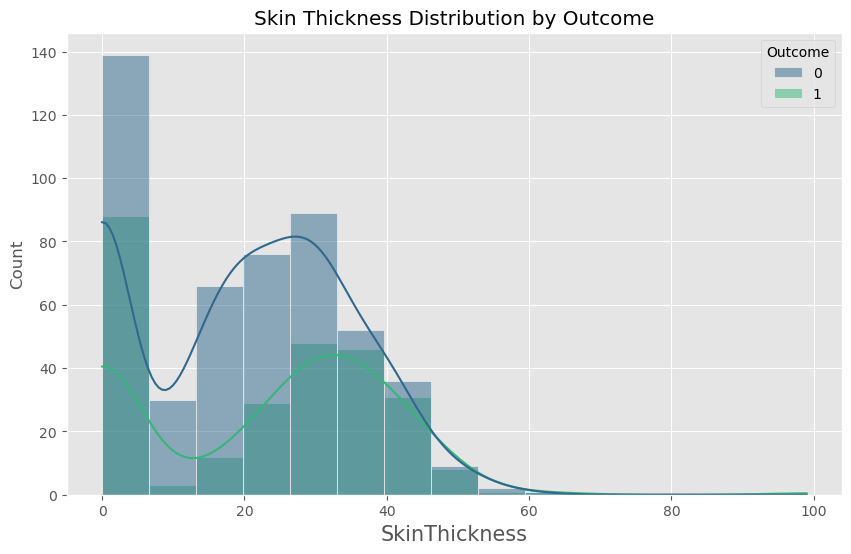

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# Plot for Age
plt.figure(figsize=(10, 6))
sns.histplot(x=df['Age'], hue=df['Outcome'], palette="viridis", kde=True)
plt.xlabel('Age', fontsize=15)
plt.title('Age Distribution by Outcome')
plt.show()

# Plot for BMI
plt.figure(figsize=(10, 6))
sns.histplot(x=df['BMI'], hue=df['Outcome'], palette="viridis", kde=True)
plt.xlabel('BMI', fontsize=15)
plt.title('BMI Distribution by Outcome')
plt.show()

# Plot for BloodPressure
plt.figure(figsize=(10, 6))
sns.histplot(x=df['BloodPressure'], hue=df['Outcome'], palette="dark", kde=True)
plt.xlabel('BloodPressure', fontsize=15)
plt.title('Blood Pressure Distribution by Outcome')
plt.show()

# Plot for DiabetesPedigreeFunction
plt.figure(figsize=(10, 6))
sns.histplot(x=df['DiabetesPedigreeFunction'], hue=df['Outcome'], palette="dark", kde=True)
plt.xlabel('DiabetesPedigreeFunction', fontsize=15)
plt.title('Diabetes Pedigree Function Distribution by Outcome')
plt.show()

# Plot for Glucose
plt.figure(figsize=(10, 6))
sns.histplot(x=df['Glucose'], hue=df['Outcome'], palette="flare", kde=True)
plt.xlabel('Glucose', fontsize=15)
plt.title('Glucose Distribution by Outcome')
plt.show()

# Plot for Insulin
plt.figure(figsize=(10, 6))
sns.histplot(x=df['Insulin'], hue=df['Outcome'], palette="flare", kde=True)
plt.xlabel('Insulin', fontsize=15)
plt.title('Insulin Distribution by Outcome')
plt.show()

# Plot for Pregnancies
plt.figure(figsize=(10, 6))
sns.histplot(x=df['Pregnancies'], hue=df['Outcome'], palette="viridis", kde=True)
plt.xlabel('Pregnancies', fontsize=15)
plt.title('Pregnancies Distribution by Outcome')
plt.show()

# Plot for SkinThickness
plt.figure(figsize=(10, 6))
sns.histplot(x=df['SkinThickness'], hue=df['Outcome'], palette="viridis", kde=True)
plt.xlabel('SkinThickness', fontsize=15)
plt.title('Skin Thickness Distribution by Outcome')
plt.show()
